In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read dataset
dataset=pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#to see the statistics
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#check the dataset features datatypes
dataset.dtypes # can see that state is categorical data and other are continuous
# we need to encode the state to numbers since it is categorical data

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
dataset.isnull().sum() # to check if there are any missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

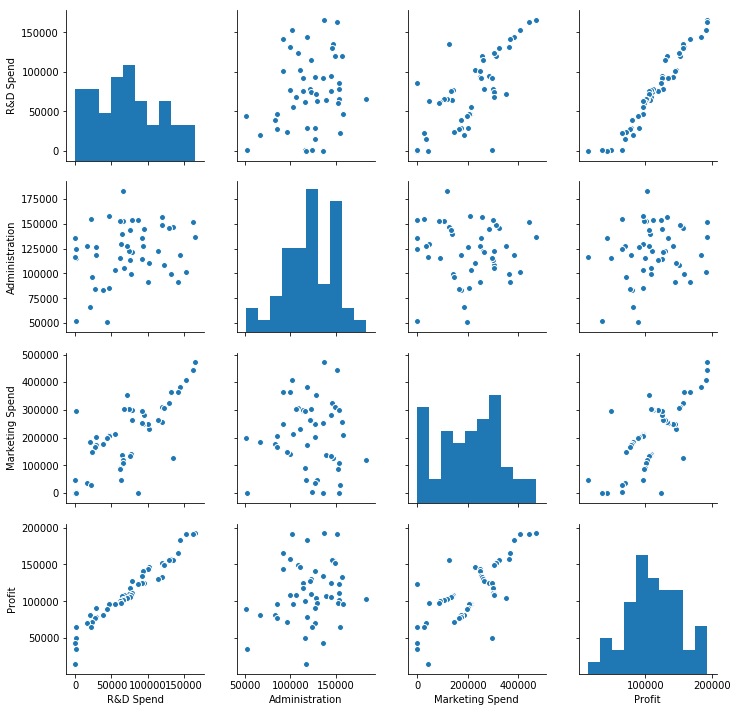

In [13]:
#do some ploting to see the distribution
sns.pairplot(dataset)
plt.show()

In [40]:
dataset['State'].value_counts()
#can see that there are 3 different categories for State variable

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [42]:
#split the data to Input and output
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [46]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [49]:
X.astype(int)
y.astype(int)

array([192261, 191792, 191050, 182901, 166187, 156991, 156122, 155752,
       152211, 149759, 146121, 144259, 141585, 134307, 132602, 129917,
       126992, 125370, 124266, 122776, 118474, 111313, 110352, 108733,
       108552, 107404, 105733, 105008, 103282, 101004,  99937,  97483,
        97427,  96778,  96712,  96479,  90708,  89949,  81229,  81005,
        78239,  77798,  71498,  69758,  65200,  64926,  49490,  42559,
        35673,  14681])

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159797, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230166,  67851.69209676,  98791.73374688,
       113969.43533013, 167921.0656955 ])

In [53]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [61]:
regressor.score(X,y)

0.9485223547171526

In [76]:
# Building the optimal model using backward elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 
# we can see only the x5 variable has p value > 0.05
# so exclude that variable and run the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.90e-28
Time:                        14:19:02   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
x1          1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
x2          1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
x3          1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     3.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
X_opt = X[:, [0, 1, 2, 3, 4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 

#now the R-squared value is 0.947 and Adj. R-Squared is 0.943 and all the variable has significant P values.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.76e-29
Time:                        14:20:07   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
x1          1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
x2          1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
x3           1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
x4             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     3.20e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""